TASK-3 : IRIS FLOWER CLASSIFICATION

 Author : Prasant D

Domain : Data Science

Aim : To develop a model that can classify iris flowers into different spicies based on their Sepal and Petal measurements.

In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster

In [ ]:
#importing dataset
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'],categories=pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


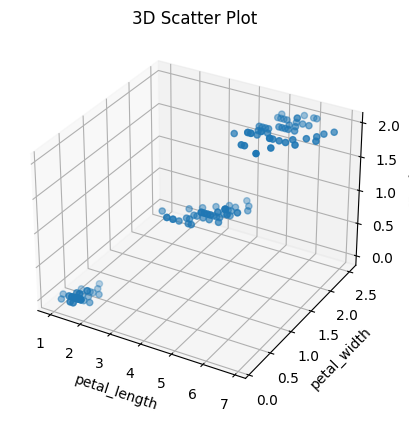

In [ ]:
#visualization of the data
!pip install matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Corrected import statement

fig=plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('species')
plt.title('3D Scatter Plot')
plt.show()

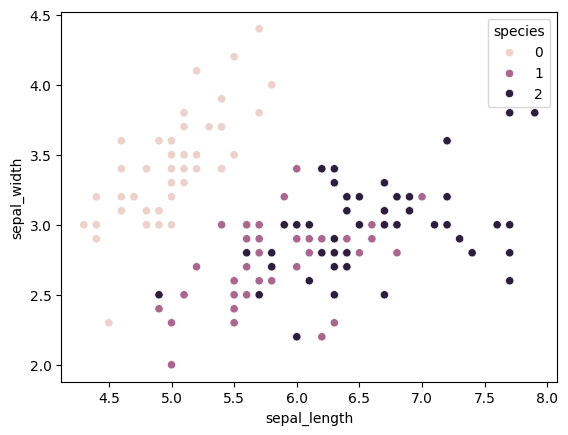

In [ ]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species");

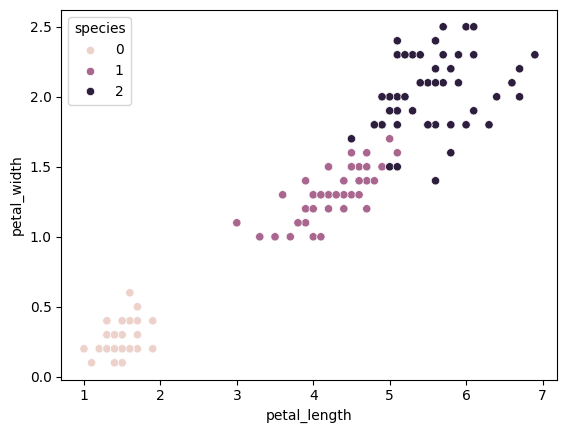

In [ ]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species");

In [ ]:
#applying elbow method
!pip install scikit-learn
from sklearn.cluster import KMeans

k_rng = range(1,10)
sse=[]

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[[ 'petal_length', 'petal_width']])
  sse.append(km.inertia_)

In [ ]:
sse

[550.8953333333333,
 86.39021984551391,
 31.412885668276974,
 19.48300089968511,
 13.91690875790876,
 11.084603984709249,
 9.215301022648848,
 7.823882284382284,
 6.537997301930805]

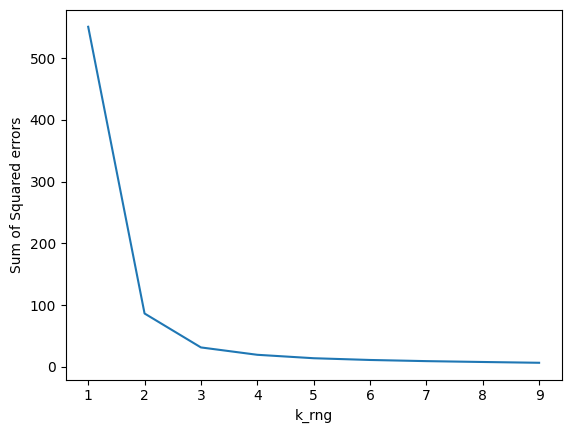

In [ ]:

plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng, sse)

In [ ]:
#applying KMean algorithm
km = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

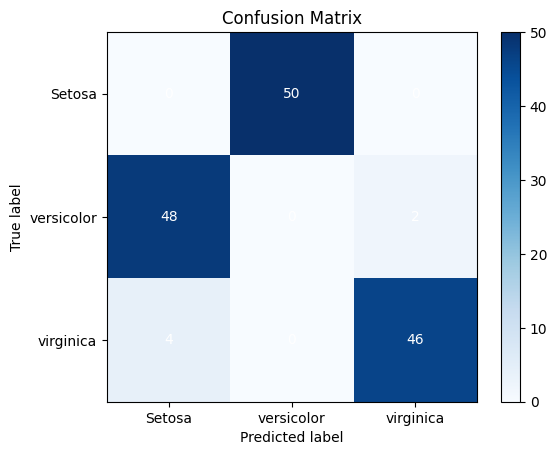

In [ ]:
true_labels = df.species
predicted_labels= df.cluster

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

#plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

#fills matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()